## 作业四-朴素贝叶斯分类器
#### 计算机科学与技术
#### 2012009 李彦泽

In [1]:
import math
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

## 初级要求

In [2]:
#获得均值和方差

def cal_para(sample):
    mean = np.mean(sample, 0)
    var = np.var(sample, 0)
    return mean, var

In [14]:
#根据高斯分布公式和贝叶斯公式计算概率

def cal_prob(test_vec, train_sample, total):
    mean, var = cal_para(train_sample)
    prob = (1 / np.sqrt(2*np.pi*var)) * np.exp(-np.square(test_vec - mean) / (2*var))
    likelihood = 1
    for each in prob:
        likelihood *= each
    return len(train_sample) / total * likelihood

In [4]:
#数据处理

f      = open('wine.data','r')
types  = [[],[],[]]                      
myline = '1'

while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)

In [5]:
#训练集和测试集的划分

train_sample1 = []
train_sample2 = []
train_sample3 = []
test_sample   = []
test_label    = []
fold          = 5

for i in range(len(types[0])):
    if i % fold != 0:
        train_sample1.append(types[0][i])
    else:
        test_sample.append(types[0][i])
        test_label.append(1)
for i in range(len(types[1])):
    if i % fold != 0:
        train_sample2.append(types[1][i])
    else:
        test_sample.append(types[1][i])
        test_label.append(2)
for i in range(len(types[2])):
    if i % fold != 0:
        train_sample3.append(types[2][i])
    else:
        test_sample.append(types[2][i])
        test_label.append(3)

train_sample1 = np.array(train_sample1)
train_sample2 = np.array(train_sample2)
train_sample3 = np.array(train_sample3)

In [15]:
#利用贝叶斯分类器进行分类

total      = len(train_sample1) + len(train_sample2) + len(train_sample3)
pre_label  = []
pre_score1 = []
pre_score2 = []
pre_score3 = []

for each in test_sample:
    prob1 = cal_prob(each, train_sample1, total)
    prob2 = cal_prob(each, train_sample2, total)
    prob3 = cal_prob(each, train_sample3, total)
    if max([prob1, prob2, prob3]) == prob1:
        pre_label.append(1)
    elif max([prob1, prob2, prob3]) == prob2:
        pre_label.append(2)
    else:
        pre_label.append(3)
    pre_score1.append(prob1)
    pre_score2.append(prob2)
    pre_score3.append(prob3)

In [7]:
#计算分类准确率

num = 0

for i in range(len(pre_label)):
    if(pre_label[i]==test_label[i]):
        num += 1

print(num/len(pre_label))

0.972972972972973


## 中级要求

In [8]:
#使用测试集评估模型，得到混淆矩阵，精度，召回率，F值

cm = np.zeros((3, 3))

for i in range(len(test_label)):
    cm[int(test_label[i]) - 1, pre_label[i] - 1] += 1

tp1 = cm[0, 0]
tp2 = cm[1, 1]
tp3 = cm[2, 2]
fn1 = cm[0, 1] + cm[0, 2]
fn2 = cm[1, 0] + cm[1, 2]
fn3 = cm[2, 0] + cm[2, 1]
fp1 = cm[1, 0] + cm[2, 0]
fp2 = cm[0, 1] + cm[2, 1]
fp3 = cm[0, 2] + cm[1, 2]
tn1 = cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2]
tn2 = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]
tn3 = cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1]

precision1 = tp1 / (tp1 + fp1)
precision2 = tp2 / (tp2 + fp2)
precision3 = tp3 / (tp3 + fp3)

recall1 = tp1 / (tp1 + fn1)
recall2 = tp2 / (tp2 + fn2)
recall3 = tp3 / (tp3 + fn3)

f1 = (2*precision1*recall1) / (precision1 + recall1)
f2 = (2*precision2*recall2) / (precision2 + recall2)
f3 = (2*precision3*recall3) / (precision3 + recall3)

In [9]:
#输出结果

print(cm, precision1, precision2, precision3, recall1, recall2, recall3, f1, f2, f3)

[[11.  1.  0.]
 [ 0. 15.  0.]
 [ 0.  0. 10.]] 1.0 0.9375 1.0 0.9166666666666666 1.0 1.0 0.9565217391304348 0.967741935483871 1.0


## 高级要求

In [28]:
#绘制ROC曲线计算AUC值

def RocAuc(pre_score,testlabel):
    fpr = []
    tpr = []
    auc = 0
    
    for i in np.argsort(pre_score)[::-1]:
        threshold = pre_score[i]
        if threshold == np.max(pre_score):
            fpr.append(0)
            tpr.append(0)
            continue
        elif threshold == np.min(pre_score):
            fpr.append(1)
            tpr.append(1)
            continue
        tp = 0
        fp = 0
        fn = 0
        tn = 0
        for j in np.argsort(pre_score)[::-1]:
            if pre_score[j] >= threshold:
                if test_label[j] == testlabel:
                    tp += 1
                else:
                    fp += 1
            else:
                if test_label[j] == testlabel:
                    fn += 1
                else:
                    tn += 1
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    
    for i in range(1, len(fpr)):
        auc += 0.5 * (fpr[i] - fpr[i - 1]) * (tpr[i] + tpr[i - 1])
        
    plt.title('ROC')
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.legend()
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    print(auc)

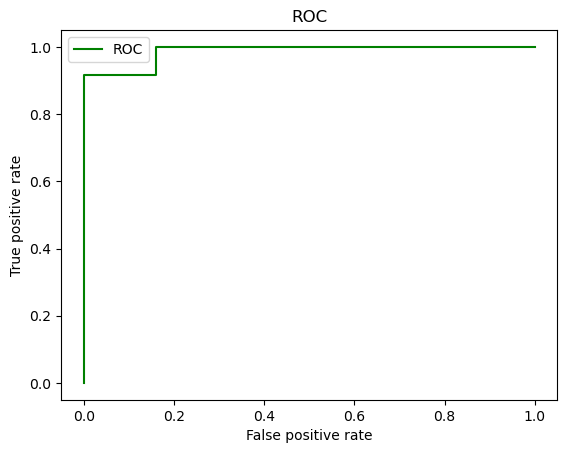

0.9866666666666667


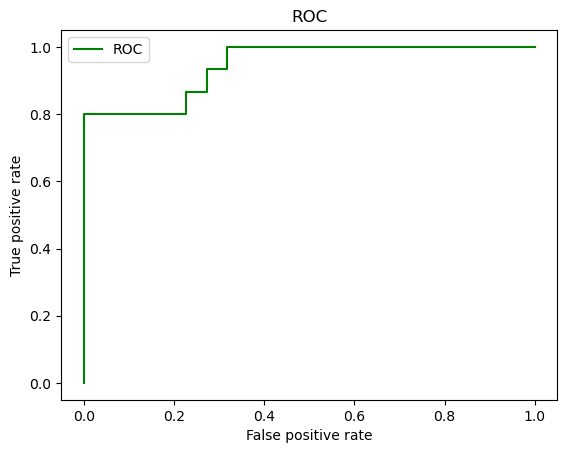

0.9454545454545454


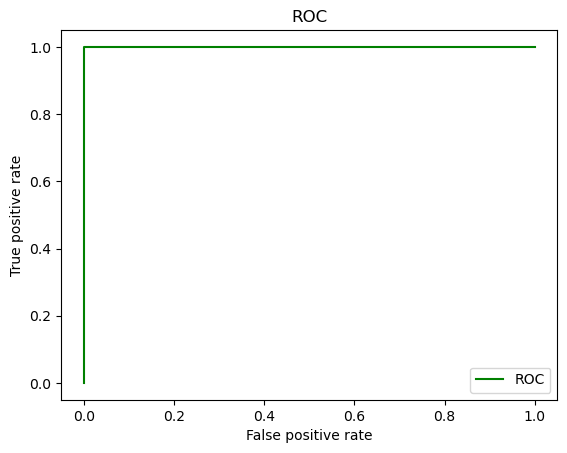

1.0


In [29]:
#可视化结果

RocAuc(pre_score1,1)
RocAuc(pre_score2,2)
RocAuc(pre_score3,3)